In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cabData = pd.read_csv("C:/Users/hampi/OneDrive/Desktop/dataset/cab_rides.csv")

In [3]:
cabData = cabData.dropna()
cabData.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [9]:
cabData.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [10]:
cabData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          637976 non-null  float64
 1   cab_type          637976 non-null  object 
 2   time_stamp        637976 non-null  float64
 3   destination       637976 non-null  object 
 4   source            637976 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  637976 non-null  float64
 7   id                637976 non-null  object 
 8   product_id        637976 non-null  object 
 9   name              637976 non-null  object 
dtypes: float64(4), object(6)
memory usage: 53.5+ MB


In [13]:
cat_columns = cabData.select_dtypes(['object']).columns
# convert all categorical columns to numeric
cabData[cat_columns] = cabData[cat_columns].apply(lambda x: pd.factorize(x)[0])

# KMeans Clustering

In [14]:
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

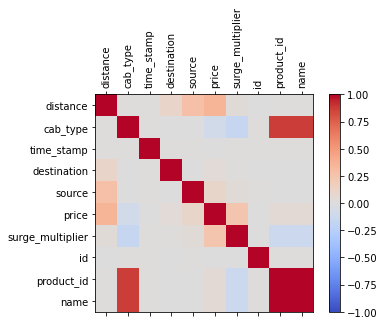

In [15]:
corr = cabData.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(cabData.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(cabData.columns)
ax.set_yticklabels(cabData.columns)
plt.show()

##### From the above plot we can see that distance and time_stamp are highly correlated

In [19]:
croppedData = cabData[['surge_multiplier', 'distance','price']]
croppedData.head()

,surge_multiplier,distance,price
0,1.0,0.44,5.0
1,1.0,0.44,11.0
2,1.0,0.44,7.0
3,1.0,0.44,26.0
4,1.0,0.44,9.0


In [20]:
X = croppedData[['distance']]
Y = croppedData[['price']]

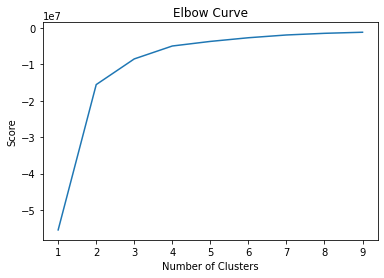

In [21]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Performing Principal Component Analysis 

In [22]:
pca = PCA(n_components=1).fit(Y)
pca_d = pca.transform(Y)
pca_c = pca.transform(X)

#### Performing K-Means

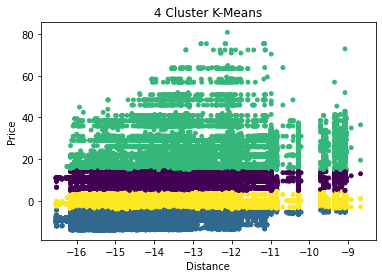

In [23]:
kmeans=KMeans(n_clusters=4)
kmeansoutput=kmeans.fit(Y)
kmeansoutput
pl.figure('4 Cluster K-Means')
#pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_.astype('float'), marker='o', s=15)
pl.xlabel('Distance')
pl.ylabel('Price')
pl.title('4 Cluster K-Means')
pl.show()

In [24]:
from scipy.stats import pearsonr, spearmanr

In [25]:
corr,_ = pearsonr(cabData['surge_multiplier'], cabData['price'])
corr

0.24045812658965857

In [26]:
corr,_ = spearmanr(cabData['distance'], cabData['price'])
corr

0.33387141139398013